In [ ]:
# import matplotlib
import json
import numpy as np
import gzip
import matplotlib.pyplot as plt
#%matplotlib inline  
%matplotlib notebook

def plot_json(filename, axis, offset=0):
    if filename.endswith(".gz"):
        with gzip.open(filename, "r") as f:
            json_dat = json.load(f)
    else:
        with open(filename, "r") as f:
            json_dat = json.load(f)
    
    r=np.core.records.fromrecords(json_dat['data'], names=json_dat['cols'])
    axis.plot((r['instruction_index']-offset)/1000, \
           r['instantaneous_misprediction_rate']*100, \
           '-',\
           label=json_dat['tag'], linewidth=1)



def plot_diff_json(filename1, filename2, axis, offset=0):
    with open(filename1, "r") as f:
        json_dat1 = json.load(f)
    with open(filename2, "r") as f:
        json_dat2 = json.load(f)    
    r1=np.core.records.fromrecords(json_dat1['data'], names=json_dat1['cols'])
    r2=np.core.records.fromrecords(json_dat2['data'], names=json_dat2['cols'])
    min_size = min(len(r1), len(r2))
    print(min_size)
    #axis.plot((r['cycle']-offset)/1000, \
    #       r['instantaneous_misprediction_rate']*100, \
    #       '-',\
    #       label=json_dat['tag'], linewidth=1)
    axis.plot((r1['instruction_index'][-min_size:]-offset)/1000, \
           (r1['instantaneous_misprediction_rate'][-min_size:] -
            r2['instantaneous_misprediction_rate'][-min_size:])*100, \
           '-',\
           label="", linewidth=1)
#r = np.recfromcsv(csv_file, case_sensitive=True)

In [ ]:
import glob
### Generate Plot of instantaneous misprediction rate vs instruction index ###
### GLOB of JSON files to plot ###
fnames =  "results/data/no-optimization/oppqb_bimode32-1ms-no.json.gz"

fnames = glob.glob(fnames)

fig = plt.figure(figsize=(9, 5), dpi=100)
ax1 = fig.add_subplot(1,1,1)

ax1.set_xlabel('Instruction (thousands)')
ax1.set_ylabel('Instantaneous Misprediction Rate (%)')
ax1.legend(loc='upper right')

for fname in fnames:
    plot_json(fname, ax1, offset=0)

ax1.legend(loc='upper right')
ax1.grid()


In [ ]:
fig.savefig('results/plots/Tournament-Towers.svg')
fig.savefig('results/plots/Tournament-Towers.png')

<IPython.core.display.Javascript object>


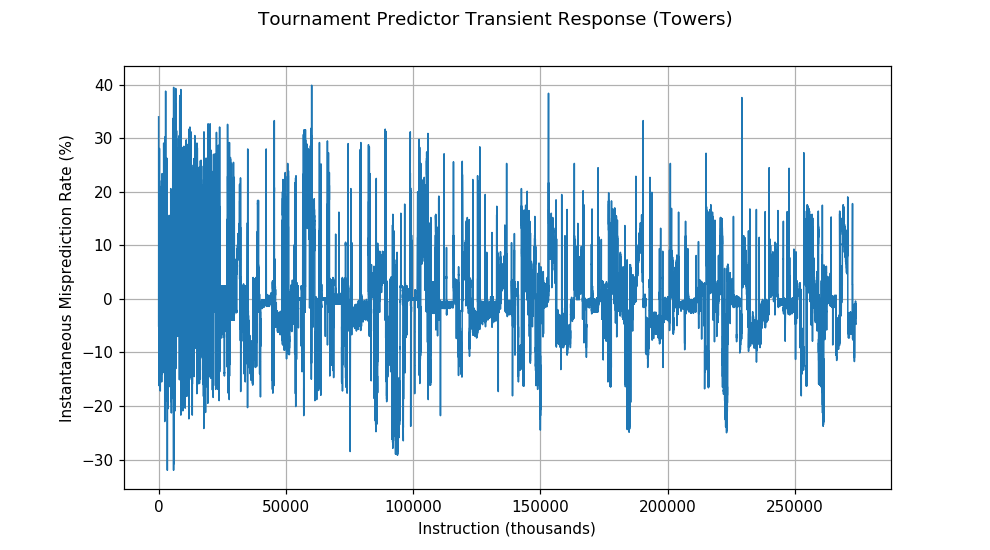

3321438


In [41]:
### Generate plot of trace F1 - F2 ###
### JSON filenames here            ###
f1 = "m5out/all_bimode8-1ms-rohan.json"
f2 = "m5out/no/all_bimode8-1ms-no.json"


fig = plt.figure(figsize=(9, 5), dpi=100)
ax1 = fig.add_subplot(1,1,1)

ax1.set_xlabel('Instruction (thousands)')
ax1.set_ylabel('Instantaneous Misprediction Rate (%)')
ax1.legend(loc='upper right')

plot_diff_json(f1, f2, ax1, offset=0)
ax1.legend(loc='upper right')

ax1.grid()

In [ ]:
<input type="file" id="theFile" />